# Tabular models

In [0]:
from fastai.tabular import *

In [33]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'


Mounted at /content/gdrive


In [34]:
!ls "/content/gdrive/My Drive/Colab Notebooks/data/Dataset/"

Building_Ownership_Use.csv  final_train.csv  train.csv
Building_Structure.csv	    test.csv


Tabular data should be in a Pandas `DataFrame`.

In [35]:
#path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/Dataset/final_train.csv")
df.head()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,...,Grade 2,0.0,0,0,0,0,0,0,0,1.0
1,1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
3,3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,...,Grade 4,0.0,0,0,0,0,0,0,0,1.0
4,4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0


In [0]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['building_id'], axis=1)

In [37]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

In [0]:
from sklearn.utils import shuffle

In [0]:
df = shuffle(df)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 279357 to 355234
Data columns (total 52 columns):
district_id                               631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
legal_ownership_status                    631761 non-null object
count_families                            631760 non-null float64
has_secondary_use                         631761 non-null float64
has_secondary_use_agriculture             631761 non-null int64
has_secondary_use_hotel                   631761 non-null int64
has_secondary_use_rental                  631761 non-null int64
has_secondary_use_institution             631761 non-null int64
has_secondary_use_school                  631761 non-null int64
has_secondary_use_industry                631761 non-null int64
has_secondary_use_health_post             631761 non-null int64
has_secondary_use_gov_office              63176

In [0]:
dep_var = 'damage_grade'
#cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
#cont_names = ['age', 'fnlwgt', 'education-num']
#procs = [FillMissing, Categorify, Normalize]

In [0]:
cat_names = ['legal_ownership_status', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration',
       'condition_post_eq', 'area_assesed']

In [0]:
cont_names = ['district_id', 'vdcmun_id', 'ward_id', 
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started']

In [44]:
len(cat_names)

10

In [45]:
len(cont_names)

41

In [46]:
df.shape

(631761, 52)

In [0]:
procs = [Categorify, Normalize]

In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/data/Dataset/"

In [0]:
test = TabularList.from_df(df.iloc[500001:631761].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [60]:
df.isnull().any()

district_id                               False
vdcmun_id                                 False
ward_id                                   False
legal_ownership_status                    False
count_families                            False
has_secondary_use                         False
has_secondary_use_agriculture             False
has_secondary_use_hotel                   False
has_secondary_use_rental                  False
has_secondary_use_institution             False
has_secondary_use_school                  False
has_secondary_use_industry                False
has_secondary_use_health_post             False
has_secondary_use_gov_office              False
has_secondary_use_use_police              False
has_secondary_use_other                   False
count_floors_pre_eq                       False
count_floors_post_eq                      False
age_building                              False
plinth_area_sq_ft                         False
height_ft_pre_eq                        

In [0]:
df['count_families'].fillna((df['count_families'].mean()), inplace=True)
df['has_repair_started'].fillna((df['has_repair_started'].mean()), inplace=True)

In [62]:
df.isnull().any()

district_id                               False
vdcmun_id                                 False
ward_id                                   False
legal_ownership_status                    False
count_families                            False
has_secondary_use                         False
has_secondary_use_agriculture             False
has_secondary_use_hotel                   False
has_secondary_use_rental                  False
has_secondary_use_institution             False
has_secondary_use_school                  False
has_secondary_use_industry                False
has_secondary_use_health_post             False
has_secondary_use_gov_office              False
has_secondary_use_use_police              False
has_secondary_use_other                   False
count_floors_pre_eq                       False
count_floors_post_eq                      False
age_building                              False
plinth_area_sq_ft                         False
height_ft_pre_eq                        

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(500001,631761)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [64]:
data.show_batch(rows=10)

legal_ownership_status,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,area_assesed,district_id,vdcmun_id,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,target
Private,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble Clear-New building built,Building removed,1.6943,1.6974,1.6976,0.0387,2.8126,3.8281,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,-0.1796,-1.2162,0.1672,-0.6611,-0.7445,-1.2007,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,-0.5821,-0.3028,-0.2113,-0.1275,-0.1235,2.6577,-0.2112,-0.0966,5.2647,3.6563,-0.0481,-0.0329,-0.1899,1.5092,Grade 5
Private,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,Damaged-Rubble clear,Building removed,0.4084,0.4249,0.4249,0.0387,-0.3555,-0.2612,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,1.1944,-1.2162,13.3188,-0.6655,0.8116,-1.2007,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,-0.5821,-0.3028,-0.2113,-0.1275,-0.1235,-0.3763,-0.2112,-0.0966,-0.1899,-0.2735,-0.0481,-0.0329,-0.1899,1.5092,Grade 5
Private,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Both,-1.7778,-1.7448,-1.7449,0.0387,2.8126,3.8281,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,1.1944,1.5174,-0.0523,-0.4016,-0.5716,0.3037,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,-0.5821,-0.3028,-0.2113,-0.1275,-0.1235,-0.3763,-0.2112,-0.0966,-0.1899,-0.2735,-0.0481,-0.0329,-0.1899,-0.6995,Grade 2
Private,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Not used,Both,-0.7490,-0.7590,-0.7589,0.0387,-0.3555,-0.2612,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,1.1944,1.5174,-0.1071,0.3553,1.3302,1.5766,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,-0.5821,-0.3028,-0.2113,-0.1275,-0.1235,2.6577,-0.2112,-0.0966,-0.1899,3.6563,-0.0481,-0.0329,5.2650,-0.6995,Grade 4
Private,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Not used,Both,-0.7490,-0.7255,-0.7256,-2.3442,-0.3555,-0.2612,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,1.1944,1.5174,-0.3402,-0.4232,0.9844,1.3452,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,1.7178,-0.3028,-0.2113,-0.1275,-0.1235,-0.3763,-0.2112,-0.0966,-0.1899,-0.2735,-0.0481,-0.0329,-0.1899,-0.6995,Grade 3
Private,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Square,Damaged-Rubble clear,Building removed,0.1512,0.1318,0.1318,-2.3442,2.8126,3.8281,-0.1882,-0.0919,-0.0313,-0.0202,-0.0330,-0.0143,-0.0120,-0.0089,-0.0710,-1.5536,-1.2162,0.0300,0.4807,-1.2632,-1.2007,-0.3125,0.5594,-0.1884,-0.1377,-0.2708,-0.2859,-0.5821,-0.3028,-0.2113,-0.1275,-0.1235,-0.3763,-0.21

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [66]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.643385,7.731438,0.709859,01:50


In [67]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.622744,117.193932,0.718116,01:55


In [68]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.624752,1.852859,0.714238,01:55
1,0.622044,44.383568,0.710231,01:55
2,0.627705,40.521015,0.711976,01:56
3,0.621995,15.296735,0.721410,01:56
4,0.602715,97.365074,0.722139,01:55


In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


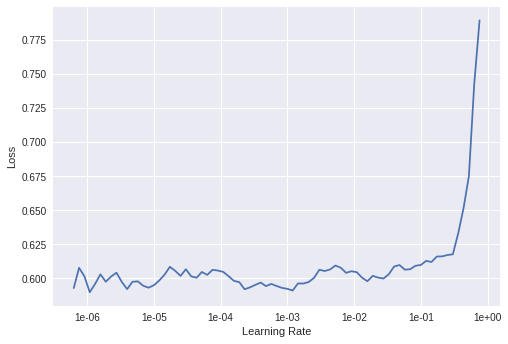

In [70]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [72]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.622653,26.474297,0.720135,01:55
1,0.602241,6.567338,0.724165,01:56


In [76]:
learn.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.600907,21.059917,0.723535,01:56
1,0.602287,9.526824,0.724218,01:56
